In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
CREMP_SCOR_Summaries_2023_Density = pd.read_csv("CREMP_SCOR_Summaries_2023_Density.csv")

In [6]:
CREMP_SCOR_Summaries_2023_Density.head()

,Year,Date,Subregion,Habitat,SiteID,Site_name,StationID,Acropora_cervicornis,Acropora_palmata,Acropora_prolifera,...,Pseudodiploria_strigosa,Scleractinia,Scolymia_cubensis,Scolymia_lacera,Siderastrea_radians,Siderastrea_siderea,Solenastrea_bournoni,Solenastrea_hyades,Stephanocoenia_intersepta,Undaria_agaricites_complex
0,2011,5/14/2011,LK,BCP,18,Content Keys,181,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0
1,2011,5/14/2011,LK,BCP,18,Content Keys,182,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.1,0.0
2,2011,5/14/2011,LK,BCP,18,Content Keys,183,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
3,2011,5/14/2011,LK,BCP,18,Content Keys,184,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.1,0.6,0.0,0.0,0.0,0.0
4,2011,6/6/2011,UK,P,21,Two Patches,211,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.4,0.2,0.0,0.1,0.1


In [8]:
CREMP_SCOR_Summaries_2023_Density.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2037 entries, 0 to 2036
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         2037 non-null   int64  
 1   Date                         2037 non-null   object 
 2   Subregion                    2037 non-null   object 
 3   Habitat                      2037 non-null   object 
 4   SiteID                       2037 non-null   int64  
 5   Site_name                    2037 non-null   object 
 6   StationID                    2037 non-null   int64  
 7   Acropora_cervicornis         2037 non-null   float64
 8   Acropora_palmata             2037 non-null   float64
 9   Acropora_prolifera           2037 non-null   float64
 10  Agaricia_fragilis            2037 non-null   float64
 11  Agaricia_lamarcki            2037 non-null   float64
 12  Cladocora_arbuscula          2037 non-null   float64
 13  Colpophyllia_natan

In [10]:
# Load data
density = CREMP_SCOR_Summaries_2023_Density.copy()

# Convert date column
density['Date'] = pd.to_datetime(density['Date'])

# Add month & season for seasonal analysis
density['Month'] = density['Date'].dt.month

# Check missing values
missing = density.isna().sum().sort_values(ascending=False)
missing[missing > 0]

Orbicella_faveolata    294
Orbicella_franksi      294
dtype: int64

In [22]:
density['Month'].unique()

array([ 5,  6,  7,  8,  9, 10, 12])

In [26]:
density['Season'] = density['Month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

In [28]:
density['Season'].unique()

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

In [12]:
# Number of sites, stations, and time range
print(f"Years: {density['Year'].min()}–{density['Year'].max()}")
print(f"Unique Sites: {density['SiteID'].nunique()}")
print(f"Unique Stations: {density['StationID'].nunique()}")
print(f"Regions: {density['Subregion'].unique().tolist()}")
print(f"Habitats: {density['Habitat'].unique().tolist()}")

Years: 2011–2023
Unique Sites: 40
Unique Stations: 160
Regions: ['LK', 'UK', 'MK']
Habitats: ['BCP', 'P', 'OS', 'OD']


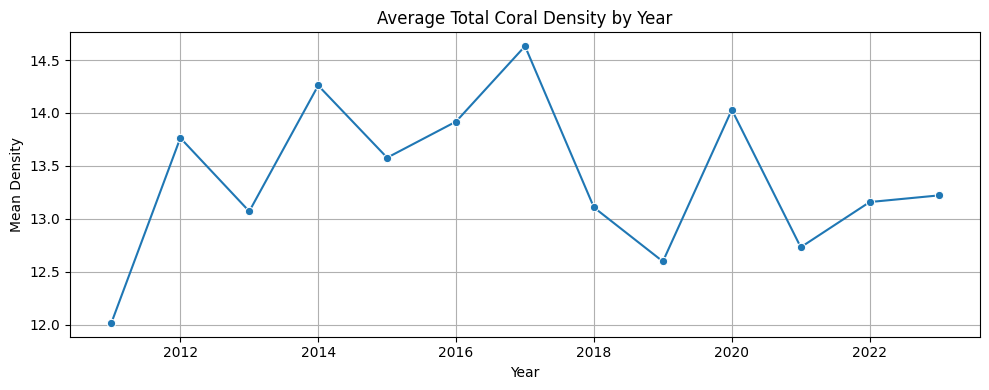

In [16]:
# Step 1: Identify coral species columns by excluding metadata
metadata_cols = ['Year', 'Date', 'Subregion', 'Habitat', 'SiteID', 'Site_name', 'StationID']
species_cols = [col for col in density.columns if col not in metadata_cols]

# Step 2: Convert species columns to numeric
density[species_cols] = density[species_cols].apply(pd.to_numeric, errors='coerce')

# Step 3: Compute Total Density
density['TotalDensity'] = density[species_cols].sum(axis=1)

# Step 4: Plot yearly average density
yearly_density = density.groupby('Year')['TotalDensity'].mean().reset_index()

plt.figure(figsize=(10, 4))
sns.lineplot(data=yearly_density, x='Year', y='TotalDensity', marker='o')
plt.title('Average Total Coral Density by Year')
plt.ylabel('Mean Density')
plt.grid(True)
plt.tight_layout()
plt.show()

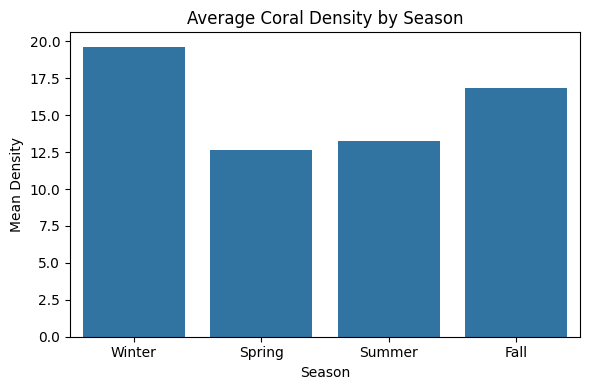

In [30]:
# Seasonal Patterns

seasonal_density = density.groupby('Season')['TotalDensity'].mean().reindex(['Winter', 'Spring', 'Summer', 'Fall'])

plt.figure(figsize=(6, 4))
sns.barplot(x=seasonal_density.index, y=seasonal_density.values)
plt.title('Average Coral Density by Season')
plt.ylabel('Mean Density')
plt.tight_layout()
plt.show()

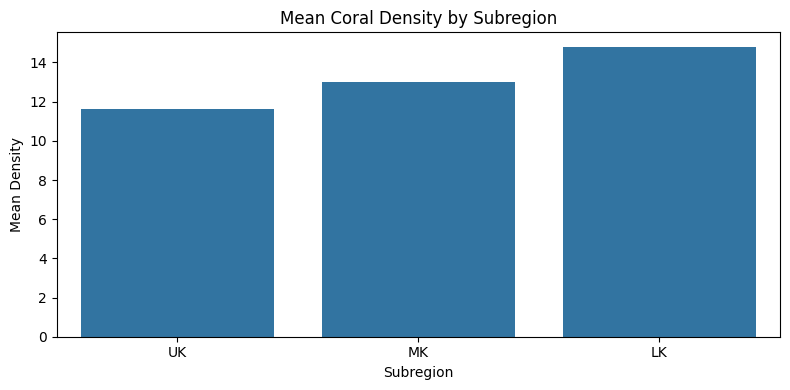

In [20]:
# Subregion Comparison

subregion_density = density.groupby('Subregion')['TotalDensity'].mean().sort_values()

plt.figure(figsize=(8, 4))
sns.barplot(x=subregion_density.index, y=subregion_density.values)
plt.title('Mean Coral Density by Subregion')
plt.ylabel('Mean Density')
plt.tight_layout()
plt.show()

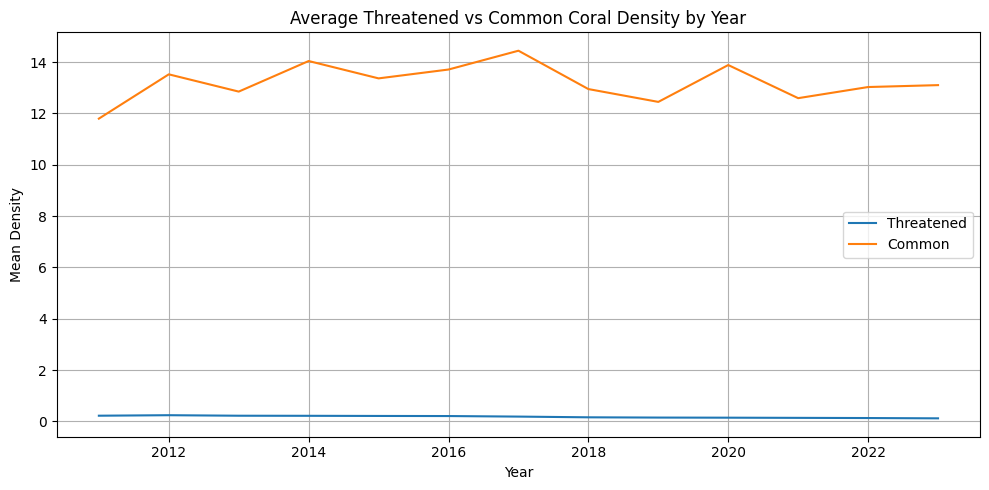

In [34]:
# Threatened vs Common Species List
threatened_species = [
    "Acropora_cervicornis", "Acropora_palmata", "Dendrogyra_cylindrus",
    "Orbicella_annularis_complex", "Orbicella_faveolata", "Orbicella_franksi"
]
common_species = [col for col in species_cols if col not in threatened_species]

# Ensure all relevant columns are numeric
density[threatened_species + common_species] = density[threatened_species + common_species].apply(pd.to_numeric, errors='coerce')

# Calculate Density
density['ThreatenedDensity'] = density[threatened_species].sum(axis=1)
density['CommonDensity'] = density[common_species].sum(axis=1)

# Group by Year
threat_over_time = density.groupby('Year')[['ThreatenedDensity', 'CommonDensity']].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=threat_over_time, x='Year', y='ThreatenedDensity', label='Threatened')
sns.lineplot(data=threat_over_time, x='Year', y='CommonDensity', label='Common')
plt.title('Average Threatened vs Common Coral Density by Year')
plt.ylabel('Mean Density')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

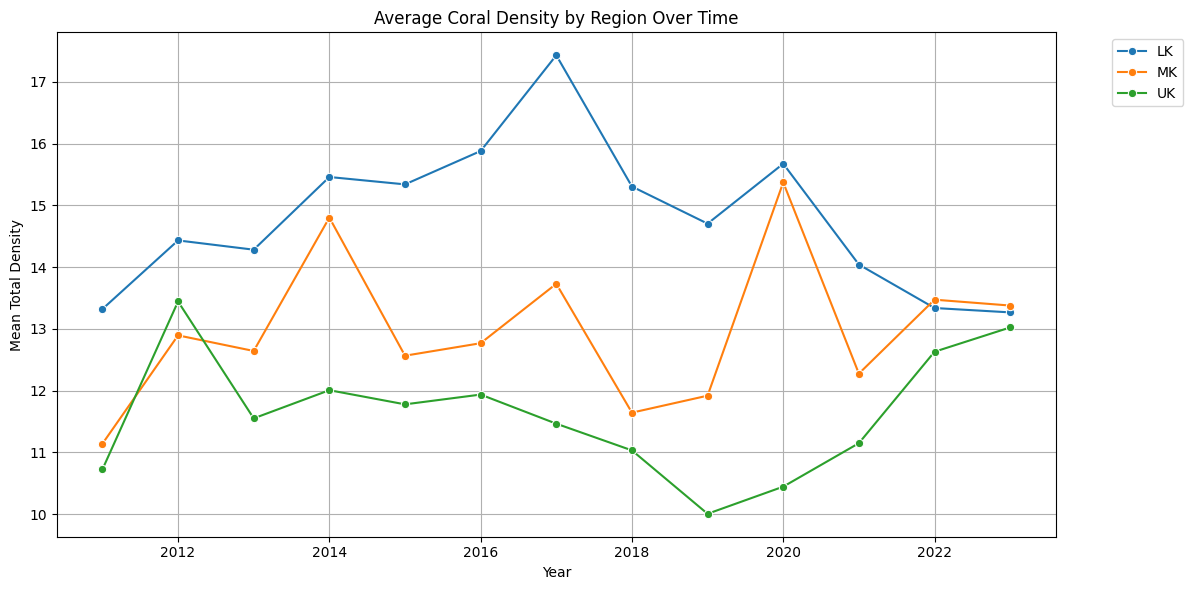

In [38]:
# Regional Density Trends

# Group by Year and Region
regional_density = density.groupby(['Year', 'Subregion'])['TotalDensity'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=regional_density, x='Year', y='TotalDensity', hue='Subregion', marker='o')
plt.title('Average Coral Density by Region Over Time')
plt.ylabel('Mean Total Density')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

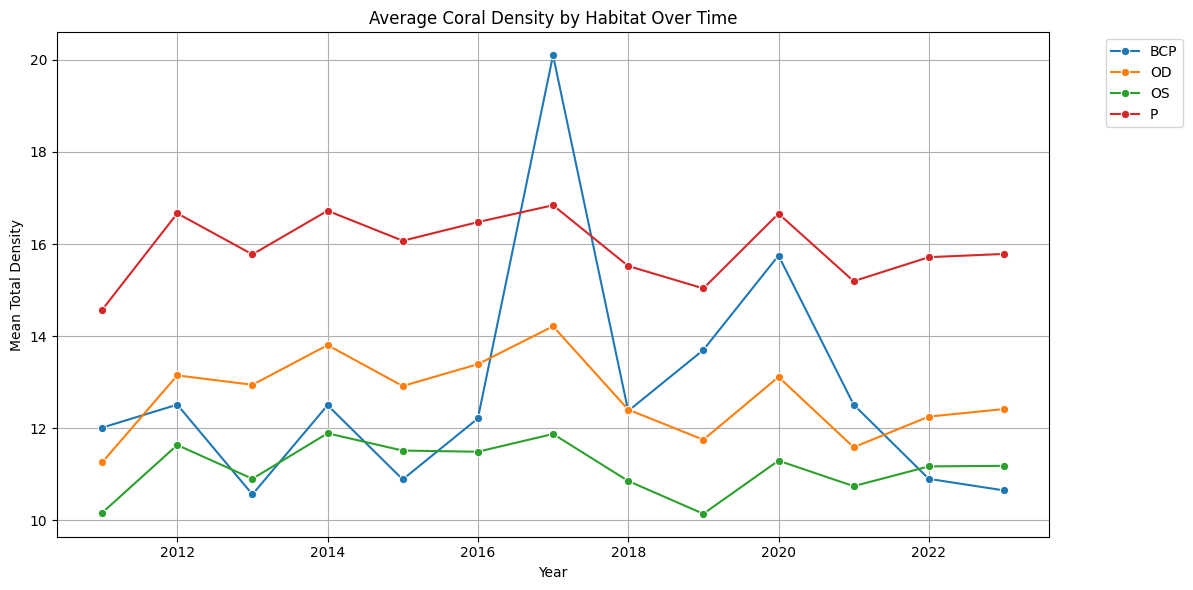

In [42]:
# Habitat Density Trends

# Group by Year and Region
habitat_density = density.groupby(['Year', 'Habitat'])['TotalDensity'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=habitat_density, x='Year', y='TotalDensity', hue='Habitat', marker='o')
plt.title('Average Coral Density by Habitat Over Time')
plt.ylabel('Mean Total Density')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

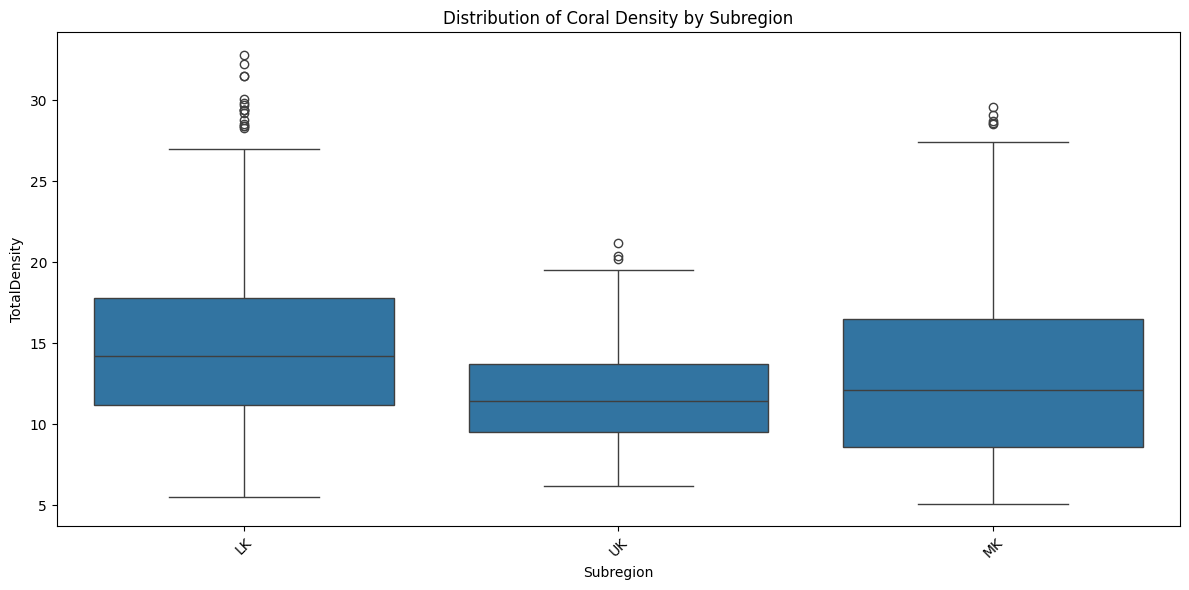

In [44]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=density, x='Subregion', y='TotalDensity')
plt.title('Distribution of Coral Density by Subregion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


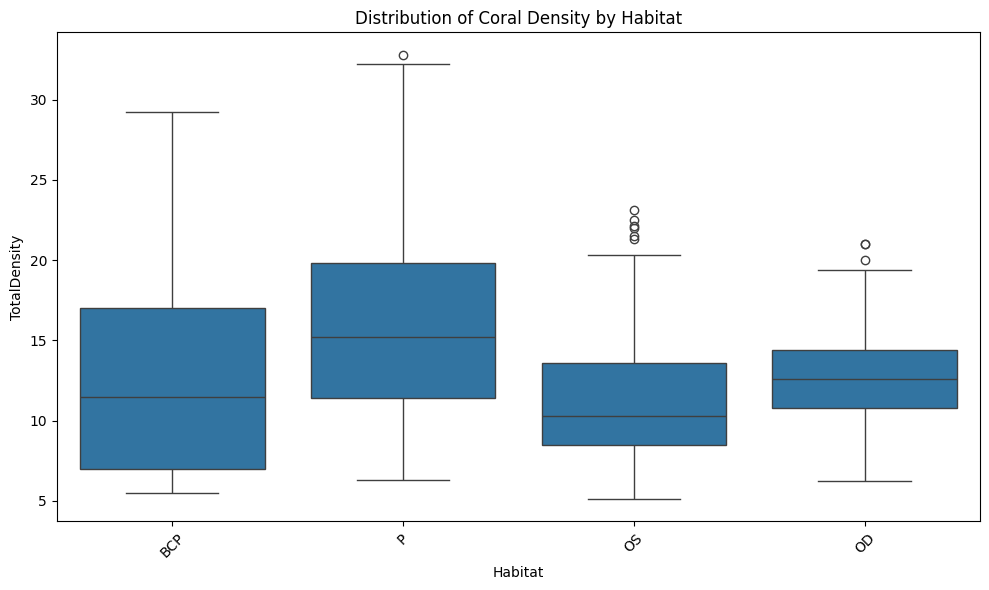

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=density, x='Habitat', y='TotalDensity')
plt.title('Distribution of Coral Density by Habitat')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


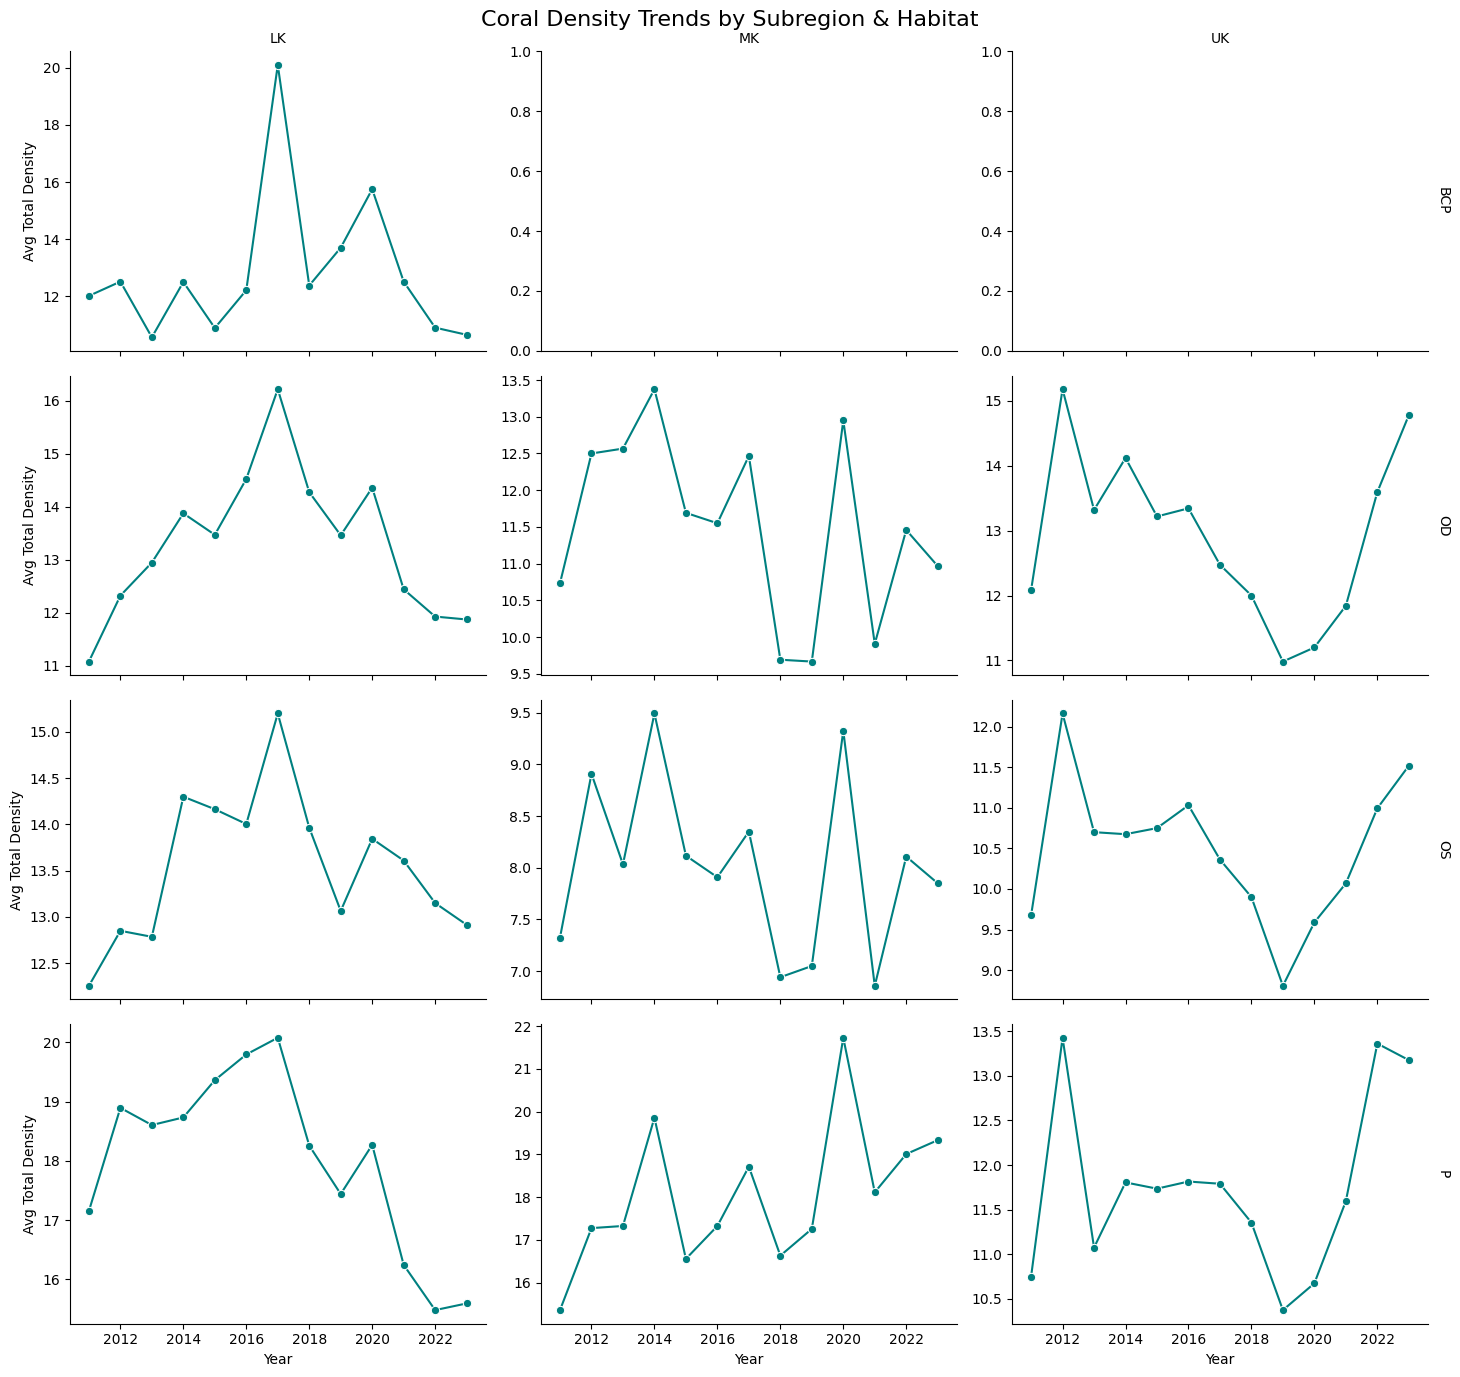

In [48]:
# Group by Year, Subregion, and Habitat
combo_density = (
    density.groupby(['Year', 'Subregion', 'Habitat'])['TotalDensity']
    .mean()
    .reset_index()
)

# Plot using FacetGrid for better separation
g = sns.FacetGrid(combo_density, col="Subregion", row="Habitat", margin_titles=True,
                  height=3.5, aspect=1.4, sharey=False)

g.map_dataframe(sns.lineplot, x="Year", y="TotalDensity", marker="o", color='teal')
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.set_axis_labels("Year", "Avg Total Density")
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle("Coral Density Trends by Subregion & Habitat", fontsize=16)
plt.tight_layout()
plt.show()
